# Project name:Used car price prediction

# Problem statement:
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-

Data Collection Phase:
     You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. more the data better the model
      In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.) You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback.

In [ ]:
#Importing necessary libraries

In [5]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv(r'C:\Users\Praveen kumar\OneDrive\Desktop\Used_Cars.csv')

In [8]:
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,"2,200 km",Petrol,Manual,"5,25,000"
1,Hyundai,2013,"91,500 km",Diesel,Manual,"5,95,000"
2,Ford,2017,"36,000 km",Diesel,Manual,"7,75,000"
3,Honda,2015,"90,000 km",Diesel,Manual,"4,00,000"
4,Maruti Suzuki,2010,"40,000 km",Petrol,Manual,"2,30,000"
...,...,...,...,...,...,...
9995,Hyundai,2012,"65,000 km",Petrol,Manual,"3,25,000"
9996,Maruti Suzuki,2018,"85,000 km",CNG & Hybrids,Manual,"2,90,000"
9997,Maruti Suzuki,2010,"72,000 km",Petrol,Manual,"3,20,000"
9998,Tata,2012,"70,000 km",Diesel,Manual,"1,85,000"


Here we are taking a look at the first 5 and last 5 rows of our dataset. It shows that we have a total of 10000 rows and 6 columns present in our dataframe. In the above cell we can see our dataset includes a target label "Used Car Price" column and the remaining feature columns can be used to determine or help in predicting the price of the used cars. Since price is a continous value it makes this to be a Regression problem!

# Exploratory Data Analysis (EDA)

In [7]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head()

We have 10000 Rows and 6 Columns in our dataframe


,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,"2,200 km",Petrol,Manual,"5,25,000"
1,Hyundai,2013,"91,500 km",Diesel,Manual,"5,95,000"
2,Ford,2017,"36,000 km",Diesel,Manual,"7,75,000"
3,Honda,2015,"90,000 km",Diesel,Manual,"4,00,000"
4,Maruti Suzuki,2010,"40,000 km",Petrol,Manual,"2,30,000"


Column Description:

Used Car Model - This shows the car model names
Year of Manufacture - Gives us the year in which the car was made
Kilometers Driven - Number of kilometers the car the driven reflecting on the Odometer
Fuel Type - Shows the fuel type used by the vehicle
Transmission Type - Gives us the manual or automatic gear shifting mechanism
Used Car Price - Lists the selling price of the used cars

In [9]:
df.isna().sum() # checking for missing values

Used Car Model         0
Year of Manufacture    0
Kilometers Driven      0
Fuel Type              0
Transmission Type      0
Used Car Price         0
dtype: int64

 we have no missing values therefore we won't have to worry about handling missing data. However we do have records with "-" in them which will need to be dealt with.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Used Car Model       10000 non-null  object
 1   Year of Manufacture  10000 non-null  object
 2   Kilometers Driven    10000 non-null  object
 3   Fuel Type            10000 non-null  object
 4   Transmission Type    10000 non-null  object
 5   Used Car Price       10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


In [11]:
df.nunique().sort_values().to_frame("Unique Values")

,Unique Values
Transmission Type,3
Fuel Type,6
Year of Manufacture,31
Used Car Price,940
Kilometers Driven,1094
Used Car Model,2056


With the help of nunique and sort_values methods we can see the number of unique values present in each of the columns in our dataset.

In [12]:
value = ["Transmission Type", "Fuel Type", "Year of Manufacture"]
for col in value:
    print(col)
    print(df[col].value_counts())
    print("="*120)

Transmission Type
Manual       8408
Automatic    1402
-             190
Name: Transmission Type, dtype: int64
Fuel Type
Diesel           5345
Petrol           4386
CNG & Hybrids     108
CNG                57
-                  56
LPG                48
Name: Fuel Type, dtype: int64
Year of Manufacture
2017    1099
2016    1021
2018     983
2015     975
2012     844
2013     802
2014     798
2011     733
2019     642
2010     519
2009     366
2008     300
2007     207
2006     148
2020     132
2005     112
2004      71
2003      55
2002      45
-         44
1999      24
2000      24
2001      16
1997      11
2021      10
1998       9
1996       3
1994       3
1995       2
1983       1
1991       1
Name: Year of Manufacture, dtype: int64


# Data pre-processing

In [13]:
# Data pre processing

df["Kilometers Driven"]=df["Kilometers Driven"].apply(lambda x: x.replace(',','') if x!='-' else '-')
df["Kilometers Driven"]=df["Kilometers Driven"].apply(lambda x: int(x.split(' ')[0]) if x!='-' else 0)
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,2200,Petrol,Manual,"5,25,000"
1,Hyundai,2013,91500,Diesel,Manual,"5,95,000"
2,Ford,2017,36000,Diesel,Manual,"7,75,000"
3,Honda,2015,90000,Diesel,Manual,"4,00,000"
4,Maruti Suzuki,2010,40000,Petrol,Manual,"2,30,000"
...,...,...,...,...,...,...
9995,Hyundai,2012,65000,Petrol,Manual,"3,25,000"
9996,Maruti Suzuki,2018,85000,CNG & Hybrids,Manual,"2,90,000"
9997,Maruti Suzuki,2010,72000,Petrol,Manual,"3,20,000"
9998,Tata,2012,70000,Diesel,Manual,"1,85,000"


The Kilometers Driven column had "-" values plus km extentions that needed to be fixed and changed to the actual numeric data.

In [14]:
try:
    df["Used Car Price"]=df["Used Car Price"].apply(lambda x: x.split(' ')[1] if x!='-' else '0,0')
except IndexError:
    pass

try:
    df["Used Car Price"]=df["Used Car Price"].apply(lambda x: str(x.replace(',', '')))
except ValueError:
    pass


In [15]:
df["Used Car Price"]=df["Used Car Price"].str.strip() # removing extra white space from the column records
df["Used Car Price"]=pd.to_numeric(df["Used Car Price"].str.replace('-','0'), errors='coerce')
df["Used Car Price"]=df["Used Car Price"].astype(float) # converting object to float data type

In [16]:
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,2200,Petrol,Manual,525000.0
1,Hyundai,2013,91500,Diesel,Manual,595000.0
2,Ford,2017,36000,Diesel,Manual,775000.0
3,Honda,2015,90000,Diesel,Manual,400000.0
4,Maruti Suzuki,2010,40000,Petrol,Manual,230000.0
...,...,...,...,...,...,...
9995,Hyundai,2012,65000,Petrol,Manual,325000.0
9996,Maruti Suzuki,2018,85000,CNG & Hybrids,Manual,290000.0
9997,Maruti Suzuki,2010,72000,Petrol,Manual,320000.0
9998,Tata,2012,70000,Diesel,Manual,185000.0


Our target label contained price values but was stored as object datatype therefore we first ensured that it is changed to proper numeric data and then converted to float data type.

In [17]:
df["Year of Manufacture"]=df["Year of Manufacture"].apply(lambda x: int(x.strip()[0:4]) if x!='-' else 0)
median_val_year=df["Year of Manufacture"].median()
df["Year of Manufacture"]=df["Year of Manufacture"].apply(lambda x: x if x!=0 else median_val_year)
df["Year of Manufacture"]=df["Year of Manufacture"].astype(int)

In [18]:
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,2200,Petrol,Manual,525000.0
1,Hyundai,2013,91500,Diesel,Manual,595000.0
2,Ford,2017,36000,Diesel,Manual,775000.0
3,Honda,2015,90000,Diesel,Manual,400000.0
4,Maruti Suzuki,2010,40000,Petrol,Manual,230000.0
...,...,...,...,...,...,...
9995,Hyundai,2012,65000,Petrol,Manual,325000.0
9996,Maruti Suzuki,2018,85000,CNG & Hybrids,Manual,290000.0
9997,Maruti Suzuki,2010,72000,Petrol,Manual,320000.0
9998,Tata,2012,70000,Diesel,Manual,185000.0


Now we are changing the year value from object to integer datatype but before that we have removed all "-" and replaced them with the median year value.

In [19]:
df["Fuel Type"]=df["Fuel Type"].apply(lambda x: x if x!='-' else 'Petrol') # replacing with common fuel type in india
df["Transmission Type"]=df["Transmission Type"].apply(lambda x: x if x!='-' else 'Manual') # common transmission is manual
df["Used Car Model"]=df["Used Car Model"].apply(lambda x: x if x!='-' else 'Hyundai') # common used car model
df["Kilometers Driven"]=df["Kilometers Driven"].apply(lambda x: x if x!='-' else 'None')
avg_usedcar_price=df["Used Car Price"].mean()
df["Used Car Price"]=df["Used Car Price"].apply(lambda x: x if x!='-' else avg_usedcar_price) # average used car prices

In [20]:
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,2200,Petrol,Manual,525000.0
1,Hyundai,2013,91500,Diesel,Manual,595000.0
2,Ford,2017,36000,Diesel,Manual,775000.0
3,Honda,2015,90000,Diesel,Manual,400000.0
4,Maruti Suzuki,2010,40000,Petrol,Manual,230000.0
...,...,...,...,...,...,...
9995,Hyundai,2012,65000,Petrol,Manual,325000.0
9996,Maruti Suzuki,2018,85000,CNG & Hybrids,Manual,290000.0
9997,Maruti Suzuki,2010,72000,Petrol,Manual,320000.0
9998,Tata,2012,70000,Diesel,Manual,185000.0


Here I have ensured that all the remaining columns with "-" records are been treated and replaced with values that made sense researching on Google and using proper replacement techniques.

In [21]:
df.nunique().sort_values().to_frame("Unique Values")

,Unique Values
Transmission Type,2
Fuel Type,5
Year of Manufacture,30
Used Car Price,751
Kilometers Driven,979
Used Car Model,2055


We are checking for the reduction in unique values since we have removed a lot of "-" data that were not captured at the time of web scraping.

In [22]:
for col in value:
    print(col)
    print(df[col].value_counts())
    print("="*120)

Transmission Type
Manual       8598
Automatic    1402
Name: Transmission Type, dtype: int64
Fuel Type
Diesel           5345
Petrol           4442
CNG & Hybrids     108
CNG                57
LPG                48
Name: Fuel Type, dtype: int64
Year of Manufacture
2017    1099
2016    1021
2018     983
2015     975
2012     844
2014     842
2013     802
2011     733
2019     642
2010     519
2009     366
2008     300
2007     207
2006     148
2020     132
2005     112
2004      71
2003      55
2002      45
1999      24
2000      24
2001      16
1997      11
2021      10
1998       9
1996       3
1994       3
1995       2
1983       1
1991       1
Name: Year of Manufacture, dtype: int64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Used Car Model       10000 non-null  object 
 1   Year of Manufacture  10000 non-null  int32  
 2   Kilometers Driven    10000 non-null  int64  
 3   Fuel Type            10000 non-null  object 
 4   Transmission Type    10000 non-null  object 
 5   Used Car Price       10000 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 429.8+ KB


In [24]:
df.describe(include="all")

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
count,10000,10000.00000,1.000000e+04,10000,10000,1.000000e+04
unique,2055,NaN,NaN,5,2,NaN
top,Maruti Suzuki,NaN,NaN,Diesel,Manual,NaN
freq,602,NaN,NaN,5345,8598,NaN
mean,NaN,2013.69860,6.914651e+04,NaN,NaN,6.608371e+05
std,NaN,4.02124,5.868048e+04,NaN,NaN,1.204508e+06
min,NaN,1983.00000,0.000000e+00,NaN,NaN,0.000000e+00
25%,NaN,2011.00000,3.500000e+04,NaN,NaN,2.549990e+05
50%,NaN,2014.00000,6.000000e+04,NaN,NaN,4.500000e+05
75%,NaN,2017.00000,9.000000e+04,NaN,NaN,6.770000e+05


Using the describe method I am taking a look at all the column value details and basically it's count, mean, standard deviation, min, 25%, 50%, 75% and max quartile data.

# Visualizations

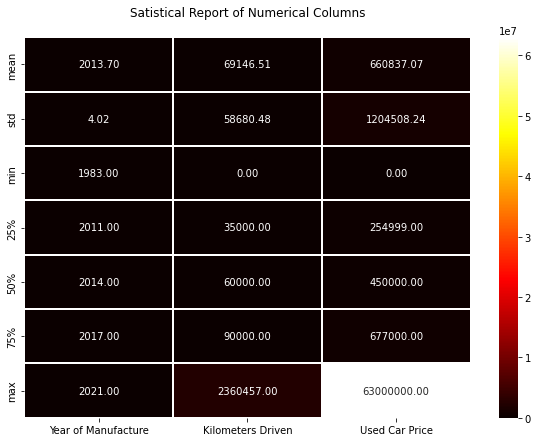

In [25]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,7))
sns.heatmap(round(df.describe()[1:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="hot")
plt.title("Satistical Report of Numerical Columns\n")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In the visual representation we have taken into consideration only the numeric data part and can see that the only abnormality is used car maximum price which is higher than all the other values.

In [26]:
df.shape

(10000, 6)

In [28]:
#Analysing data of the column 'Fuel'
df['Fuel Type'].value_counts()

Diesel           5345
Petrol           4442
CNG & Hybrids     108
CNG                57
LPG                48
Name: Fuel Type, dtype: int64

In [29]:
#Removing the null values from the column 'Fuel'
#replace the values with mode

from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Fuel Type']=imp.fit_transform(df['Fuel Type'].values.reshape(-1,1))

In [30]:
#Lets check the null values again if they are removed or not
df.isnull().sum()

Used Car Model         0
Year of Manufacture    0
Kilometers Driven      0
Fuel Type              0
Transmission Type      0
Used Car Price         0
dtype: int64

In [31]:
#Checking for correlation
df.corr()

,Year of Manufacture,Kilometers Driven,Used Car Price
Year of Manufacture,1.000000,-0.391988,0.278422
Kilometers Driven,-0.391988,1.000000,-0.147619
Used Car Price,0.278422,-0.147619,1.000000


<AxesSubplot:>

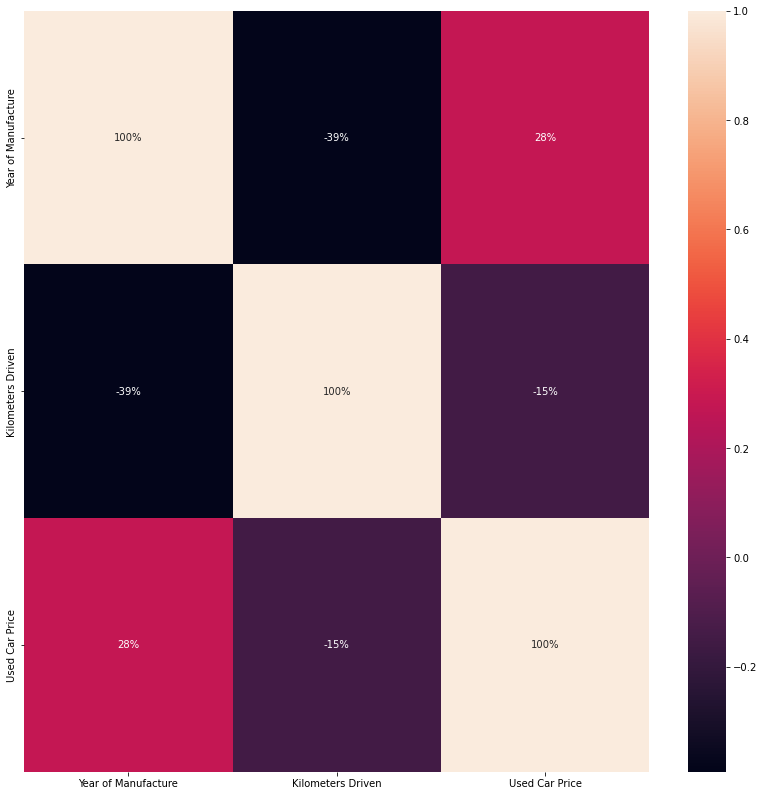

In [32]:
#Visualizing the correlation
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

From the correlation matrix,we can see that less columns are positively correlated with the target variable 'Price'.We can see that the independent variables are highly correlated with each other

array([[<AxesSubplot:title={'center':'Year of Manufacture'}>,
        <AxesSubplot:title={'center':'Kilometers Driven'}>,
        <AxesSubplot:title={'center':'Used Car Price'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

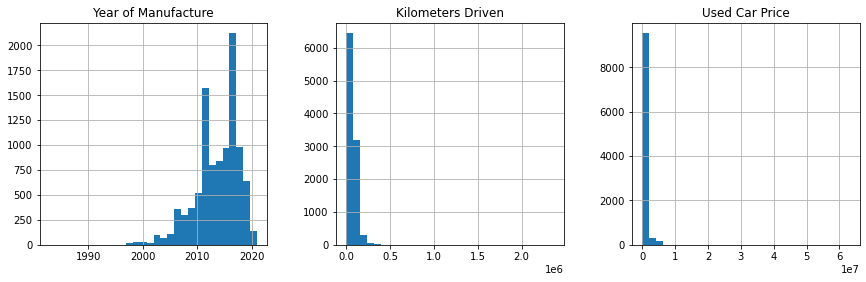

In [33]:
#Plotting histogram
#A histogram shows the frequency on the vertical axis and the horizontal axis in another dimension. 
# In this graph, we can also check whether the graph is right skewed, left skewed or the graph is normally distributed graph
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [34]:
#Checking skewness in my data
df.skew()

Year of Manufacture    -0.970990
Kilometers Driven       9.944101
Used Car Price         28.995597
dtype: float64

Year of Manufacture       AxesSubplot(0.125,0.71587;0.133621x0.16413)
Kilometers Driven      AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Used Car Price          AxesSubplot(0.44569,0.71587;0.133621x0.16413)
dtype: object

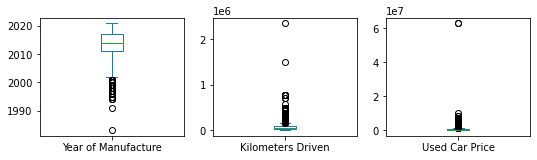

In [35]:
#Checking outliers using boxplots
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

From the boxplots,it is clearly seen that no such outliers are present,so I will not go for outlier removal.

In [36]:
#Splitting the independent and target variable in x and y
x=df.drop('Used Car Price',axis=1)
y=df['Used Car Price']

In [39]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Used Car Model'] = le.fit_transform(df['Used Car Model'])
df['Fuel Type'] = le.fit_transform(df['Fuel Type'])
df['Transmission Type'] = le.fit_transform(df['Transmission Type'])
#Now lets check the first five rows of the dataset

In [42]:
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,460,2017,2200,4,1,525000.0
1,460,2013,91500,2,1,595000.0
2,186,2017,36000,2,1,775000.0
3,318,2015,90000,2,1,400000.0
4,1274,2010,40000,4,1,230000.0
...,...,...,...,...,...,...
9995,460,2012,65000,4,1,325000.0
9996,1274,2018,85000,1,1,290000.0
9997,1274,2010,72000,4,1,320000.0
9998,1633,2012,70000,2,1,185000.0


In [43]:
#Splitting the independent and target variable in x and y
x=df.drop('Used Car Price',axis=1)
y=df['Used Car Price']

In [44]:
#Using StandardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [45]:
#Model Building(Finding the best random state)

model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score=0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        r2_sc=r2_score(test_y,pre)
        print('r2 score correspond to random state',r_state,'is',r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i
print()
print()
print()
print()
print('max r2 score correspond to random state',final_state,'is',max_r2_score,'and model is',final_model) 

r2 score correspond to random state 40 is 0.21767344196673288
r2 score correspond to random state 40 is 0.210091194860762
r2 score correspond to random state 40 is 0.16604701018379986
r2 score correspond to random state 40 is 0.10584400014399953
r2 score correspond to random state 40 is 0.20562060071742516
r2 score correspond to random state 41 is 0.34800785126610956
r2 score correspond to random state 41 is 0.28942194922159414
r2 score correspond to random state 41 is 0.21352446817028825
r2 score correspond to random state 41 is 0.15176763041279784
r2 score correspond to random state 41 is 0.3278324477470511
r2 score correspond to random state 42 is 0.32078385963496325
r2 score correspond to random state 42 is 0.2746736234840115
r2 score correspond to random state 42 is 0.17108301148471072
r2 score correspond to random state 42 is 0.14694565843750484
r2 score correspond to random state 42 is 0.3187113868842977
r2 score correspond to random state 43 is 0.7623837010629307
r2 score corre

Above I am using for loop which helps me to provide the r2 score at each random state and for the best state where r2 score is maximum has come as output value.

The best model is DecisionTreeRegressor and the r2 score is 88% to random state 83.

In [46]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=60,test_size=0.33)

In [47]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(train_x,train_y)

DecisionTreeRegressor()

In [48]:
y_pred=dt.predict(test_x)

In [49]:
dt.score(train_x,train_y)

0.40838774448938486

In [50]:
dt.score(test_x,test_y)

0.8609120858419017

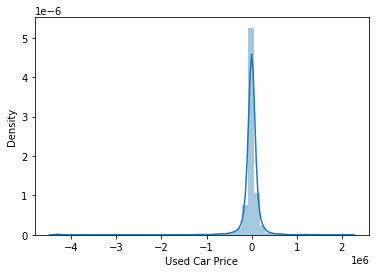

In [51]:
#Distribution plot
sns.distplot(test_y-y_pred)
plt.show()

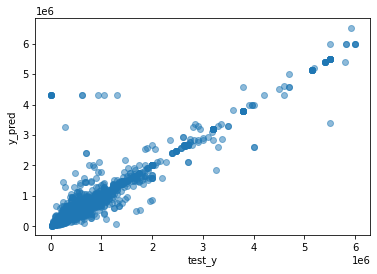

In [52]:
#Scatter-plot
plt.scatter(test_y, y_pred, alpha = 0.5)
plt.xlabel("test_y")
plt.ylabel("y_pred")
plt.show()

In [53]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(test_y,y_pred))
print('Mean Squared Error:',mean_squared_error(test_y,y_pred))
print('Root Mean Absolute Error:',np.sqrt(mean_absolute_error(test_y,y_pred)))

Mean Absolute Error: 90299.62931903449
Mean Squared Error: 85992606756.53409
Root Mean Absolute Error: 300.49896725119453


In [63]:
from sklearn.model_selection import cross_val_score

# Hyper parameter tuning

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [68]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(train_x,train_y)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [70]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(train_x,train_y)
pred_ls=ls.predict(test_x)
lss=r2_score(test_y,pred_ls)
lss

0.4617515020688364

In [71]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.33006058132558824

In [74]:
Finalmod=DecisionTreeRegressor()
Finalmod.fit(train_x,train_y)
pred_final=Finalmod.predict(test_x)
rfs=r2_score(test_y,pred_final)
print('R2 Score', rfs*100)

rfscore=cross_val_score(Finalmod,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val score', rfc*100)

R2 Score 85.35790310912405
Cross Val score 66.49913643533552


We have got accuracy of 85% on training and 66% on Cross validation

The accuracy obtained using Decision tree regressor() is 85%